<a href="https://colab.research.google.com/github/piyanka/WEB-APP/blob/main/Health%20insurance%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health Insurance Cross Sell Prediction 🏠 🏥
### Predict Health Insurance Owners' who will be interested in Vehicle Insurance

#### Problem Statement -

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

#### Understanding of Problem Statement and Data -

Predicting whether user who has a health insurance will be interested in getting a vehicle insurance or not based on the following data -

- Gender
- Age
- Driving Licencse Status
- Region Code
- Previously Vehicle Insurance Status
- Vehicle Age
- Vehicle Damage
- Annual Premium
- Sales Channel
- No. of Days of Customer Association (Vintage)

## Importing necessary packages and opendatasets module to get data from Kaggle

In [ ]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the data

In [ ]:
od.download('https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manishkumar7432698
Your Kaggle Key: ··········


100%|██████████| 6.47M/6.47M [00:00<00:00, 38.9MB/s]


In [ ]:
os.listdir('health-insurance-cross-sell-prediction')

['train.csv', 'sample_submission.csv', 'test.csv']

In [ ]:
raw_train_df = pd.read_csv('health-insurance-cross-sell-prediction/train.csv')
raw_test_df = pd.read_csv('health-insurance-cross-sell-prediction/test.csv')

In [ ]:
raw_train_df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
raw_test_df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
5,381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266
6,381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107
7,381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232
8,381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277
9,381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133


## Exploratory Data Analysis

In [ ]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [ ]:
len(raw_train_df)

381109

In [ ]:
len(raw_test_df)

127037

As we can see, our train and test data has no missing or NaN values.

Description for Numerical Columns

In [ ]:
raw_train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Dexription for Categorical Columns

In [ ]:
raw_train_df.describe(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Visualization of Data

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
fig = px.histogram(
    raw_train_df,
    x='Response',
    marginal='box',
    color='Gender',
    color_discrete_sequence=['blue', 'red'],
    title='Gender and Response Correlation'
)
fig.update_layout(bargap=0.1)
fig.show()

It is noticable that Gender does not play much role in Response of the Customer and the ratio for both positive and negative response is almost equal.

In [ ]:
fig = px.histogram(
    raw_train_df,
    x='Response',
    marginal='box',
    color='Vehicle_Damage',
    title='Vehicle Damage and Response Correlation'
)
fig.update_layout(bargap=0.1)
fig.show()

There is a clear relation and bias in people who have a damaged vehicle and are interested in taking the insurance.

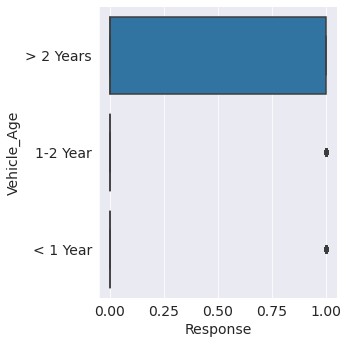

In [ ]:
sns.catplot(x="Response", y="Vehicle_Age", data=raw_train_df, kind="box")

Owners who have newer cars are more inclined to get insurance as expected.

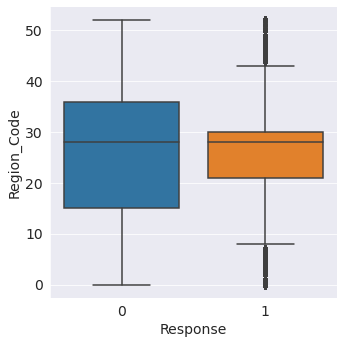

In [ ]:
sns.catplot(x="Response", y="Region_Code", data=raw_train_df, kind="box")

Less correlation is there between region and response.

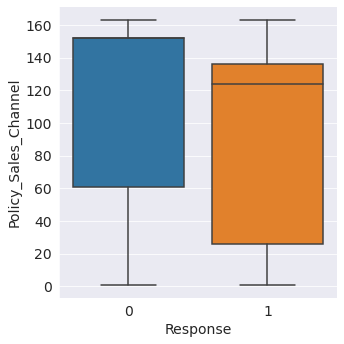

In [ ]:
sns.catplot(x="Response", y="Policy_Sales_Channel", data=raw_train_df, kind="box")

Less correlation is there between sales channel and response.

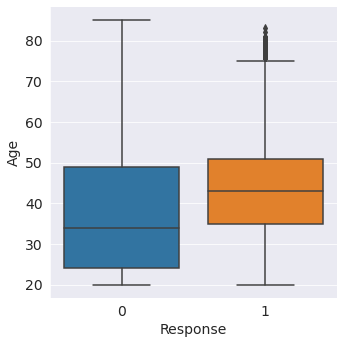

In [ ]:
sns.catplot(x="Response", y="Age", data=raw_train_df, kind="box")

Younger age vehicle owners are slightly less interested in getting vehicle insurance.

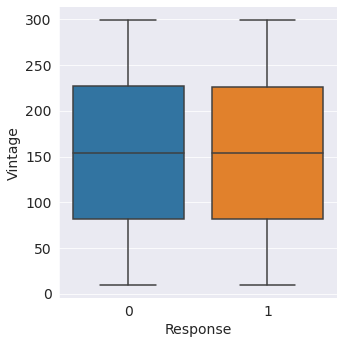

In [ ]:
sns.catplot(x="Response", y="Vintage", data=raw_train_df, kind="box")

Minimal correlation is there between how long customer is associated to company.

In [ ]:
corr_data = raw_train_df.drop(['id'],axis = 1)

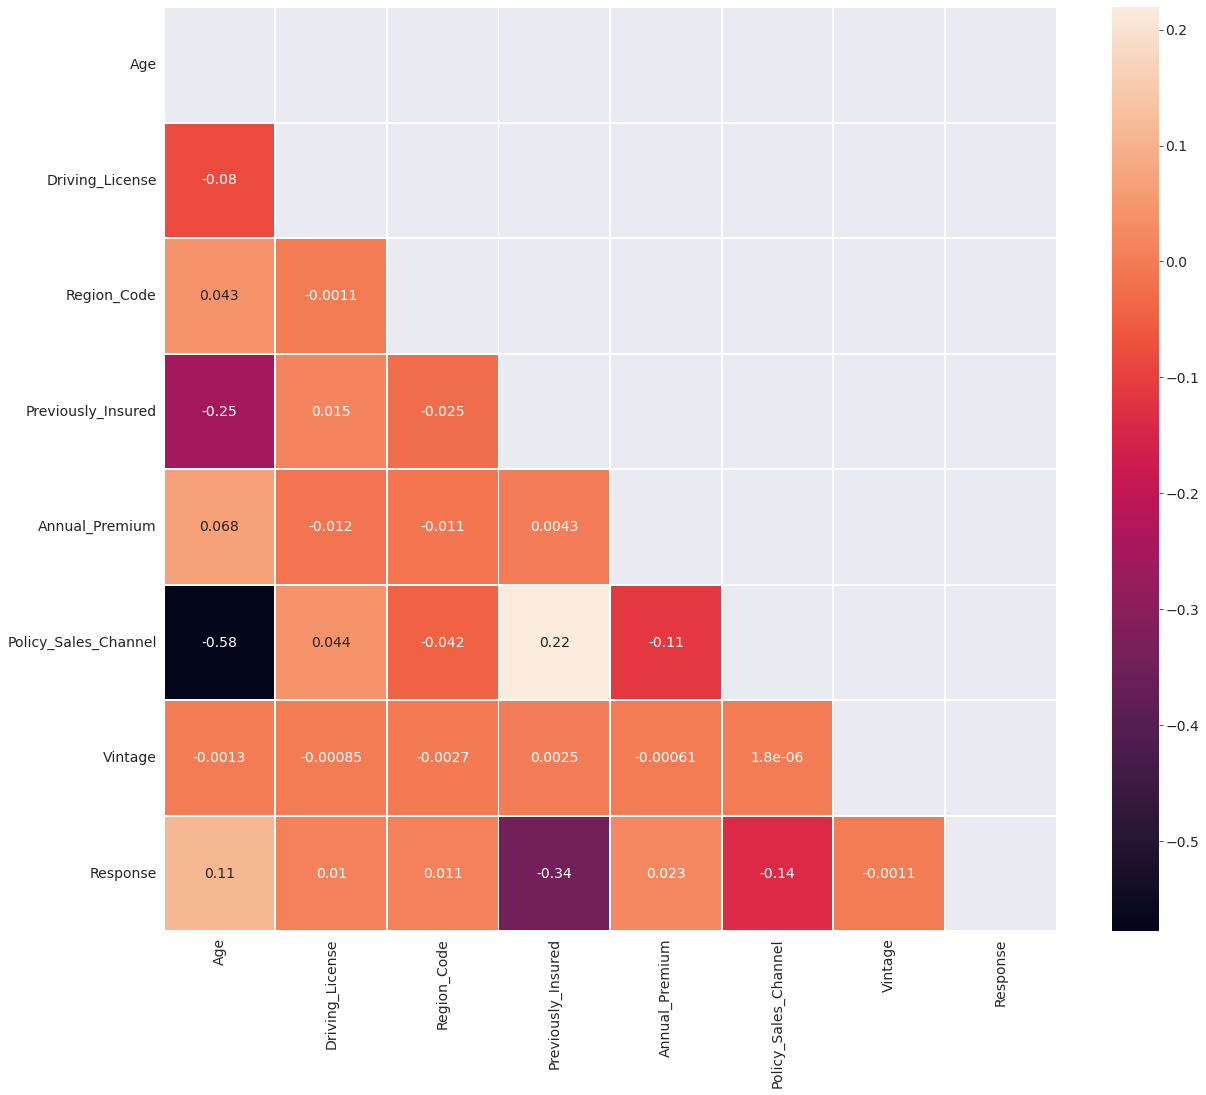

In [ ]:
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

This shows the entire correlation table but without the categorical columns.

## Data Preprocessing

In [ ]:
raw_train_df["Gender"].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
raw_test_df["Gender"].value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

In [ ]:
raw_train_df["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
raw_test_df["Vehicle_Damage"].value_counts()

Yes    63835
No     63202
Name: Vehicle_Damage, dtype: int64

In [ ]:
raw_train_df["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
raw_test_df["Vehicle_Age"].value_counts()

1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64

Since all three categorical columns have less number of unique data, we can use manual lae encoding for them and convert them to numberical data. Also id column can be dropped from both training and testing data.

#### Encoding Categorical Columns

In [ ]:
def categorical_data_preprocessing(df):
    df.drop("id" , axis = 1 , inplace = True)
    df["Vehicle_Age"].replace({"> 2 Years":3,"1-2 Year":2,"< 1 Year":1},inplace = True)
    df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
    df["Vehicle_Damage"] = df["Vehicle_Damage"].map({"Yes":1,"No":0})
    return df

In [ ]:
train_df = categorical_data_preprocessing(raw_train_df)

In [ ]:
test_df = categorical_data_preprocessing(raw_test_df)

In [ ]:
train_df.shape

(381109, 11)

In [ ]:
test_df.shape

(127037, 10)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  int64  
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  int64  
 6   Vehicle_Damage        127037 non-null  int64  
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 9.7 MB


#### Scaling Numeric Data

In [ ]:
numeric_cols = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [ ]:
train_df[numeric_cols] = scaler.transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [ ]:
train_df.describe().loc[['min', 'max']]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
min,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
test_df.describe().loc[['min', 'max']]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
min,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,3.0,1.0,0.873268,1.0,1.0


In [ ]:
train_df.head(20)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.369231,1,0.538462,0,3,1,0.070366,0.154321,0.716263,1
1,1,0.861538,1,0.057692,0,2,0,0.057496,0.154321,0.598616,0
2,1,0.415385,1,0.538462,0,3,1,0.066347,0.154321,0.058824,1
3,1,0.015385,1,0.211538,1,1,0,0.048348,0.932099,0.667820,0
4,0,0.138462,1,0.788462,1,1,0,0.046259,0.932099,0.100346,0
5,0,0.061538,1,0.634615,0,1,1,0.000000,0.981481,0.574394,0
6,1,0.046154,1,0.211538,0,1,1,0.038578,0.932099,0.826990,0
7,0,0.553846,1,0.538462,0,2,1,0.054696,0.154321,0.214533,1
8,0,0.061538,1,0.057692,1,1,0,0.046488,0.932099,0.062284,0
9,0,0.184615,1,0.115385,1,1,0,0.048631,0.932099,0.242215,0


In [ ]:
test_df.head(20)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,0.076923,1,0.211538,1,1,0,0.061682,0.932099,0.148789
1,1,0.307692,1,0.538462,0,2,1,0.057916,0.037037,0.349481
2,1,0.415385,1,0.538462,0,2,1,0.069614,0.759259,0.653979
3,1,0.061538,1,0.519231,1,1,1,0.064602,0.932099,0.612457
4,1,0.107692,1,0.538462,1,1,0,0.105048,0.932099,0.993080
5,1,0.030769,1,0.576923,1,1,0,0.069906,0.932099,0.885813
6,0,0.476923,1,0.711538,1,2,0,0.069741,0.154321,0.335640
7,1,0.076923,1,0.788462,1,1,0,0.038593,0.932099,0.768166
8,1,0.338462,1,0.788462,0,2,1,0.000000,0.154321,0.923875
9,0,0.261538,1,0.230769,1,2,0,0.045567,0.759259,0.425606


## Training, Validation and Test Data

In [ ]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'Response'

In [ ]:
X = train_df[input_cols]
y = train_df[target_col]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_val.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
200222,0,0.015385,1,0.057692,1,1,0,0.033073,0.981481,0.214533
49766,1,0.538462,1,0.288462,0,2,1,0.064866,0.154321,0.318339
172201,0,0.323077,1,0.057692,0,2,1,0.000000,0.154321,0.276817
160713,0,0.092308,1,0.211538,0,1,0,0.000000,0.925926,0.892734
53272,1,0.476923,1,0.769231,0,2,1,0.058370,0.759259,0.882353
372603,0,0.076923,1,0.403846,1,1,0,0.000000,0.932099,0.588235
216160,1,0.507692,1,0.134615,0,3,1,0.081236,0.154321,0.702422
59206,0,0.030769,1,0.538462,1,1,0,0.043279,0.938272,0.674740
26462,0,0.646154,1,0.673077,0,2,1,0.077243,0.759259,0.505190
95043,1,0.353846,1,0.538462,0,2,1,0.047802,0.759259,0.200692


In [ ]:
len(X_val)

76222

In [ ]:
y_val.head(10)

200222    0
49766     0
172201    0
160713    0
53272     0
372603    0
216160    0
59206     0
26462     0
95043     1
Name: Response, dtype: int64

In [ ]:
len(y_val)

76222

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
%%time
y_train_preds = model.predict(X_train)
y_train_probs = model.predict_proba(X_train)
accuracy_score(y_train, y_train_preds)

CPU times: user 94.7 ms, sys: 50 ms, total: 145 ms
Wall time: 166 ms


0.8779154244031395

In [ ]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 87.50%
CPU times: user 167 ms, sys: 113 ms, total: 280 ms
Wall time: 289 ms


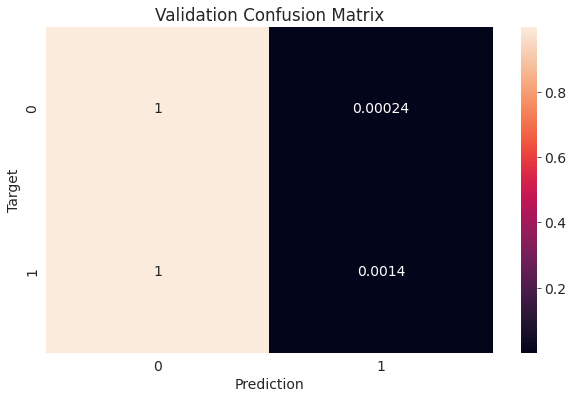

In [ ]:
%%time
val_preds = predict_and_plot(X_val, y_val, 'Validation')

Logistic Regression Model -

Training Accuracy - 87.79154244031395%

Validation Accuracy - 87.50%

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_2 = DecisionTreeClassifier(random_state=42)

In [ ]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
y_train_preds_2 = model_2.predict(X_train)
y_train_probs_2 = model_2.predict_proba(X_train)
accuracy_score(y_train, y_train_preds_2)

CPU times: user 233 ms, sys: 1.71 ms, total: 235 ms
Wall time: 233 ms


0.9998852033704291

In [ ]:
def predict_and_plot_2(inputs, targets, name=''):
    preds = model_2.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 82.18%
CPU times: user 134 ms, sys: 44.4 ms, total: 178 ms
Wall time: 130 ms


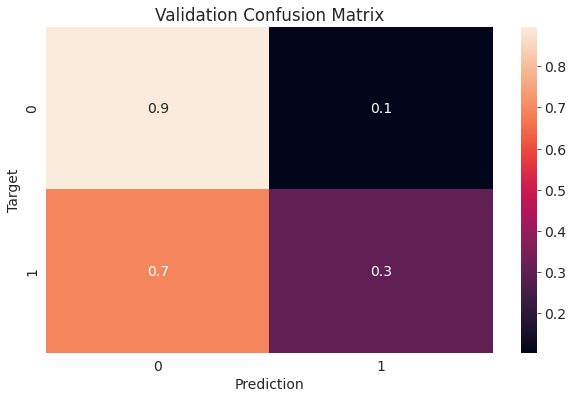

In [ ]:
%%time
val_preds = predict_and_plot_2(X_val, y_val, 'Validation')

Decision Tree Model without hyperparameter tuning-

Training Accuracy - 99.98852033704291%

Validation Accuracy - 82.18%

This model seems to be overfitting as training accuracy is very high and the validation accuracy is not so.

## Visualization and Hyperparameter Tuning of Decision Tree

In [ ]:
from sklearn.tree import plot_tree, export_text

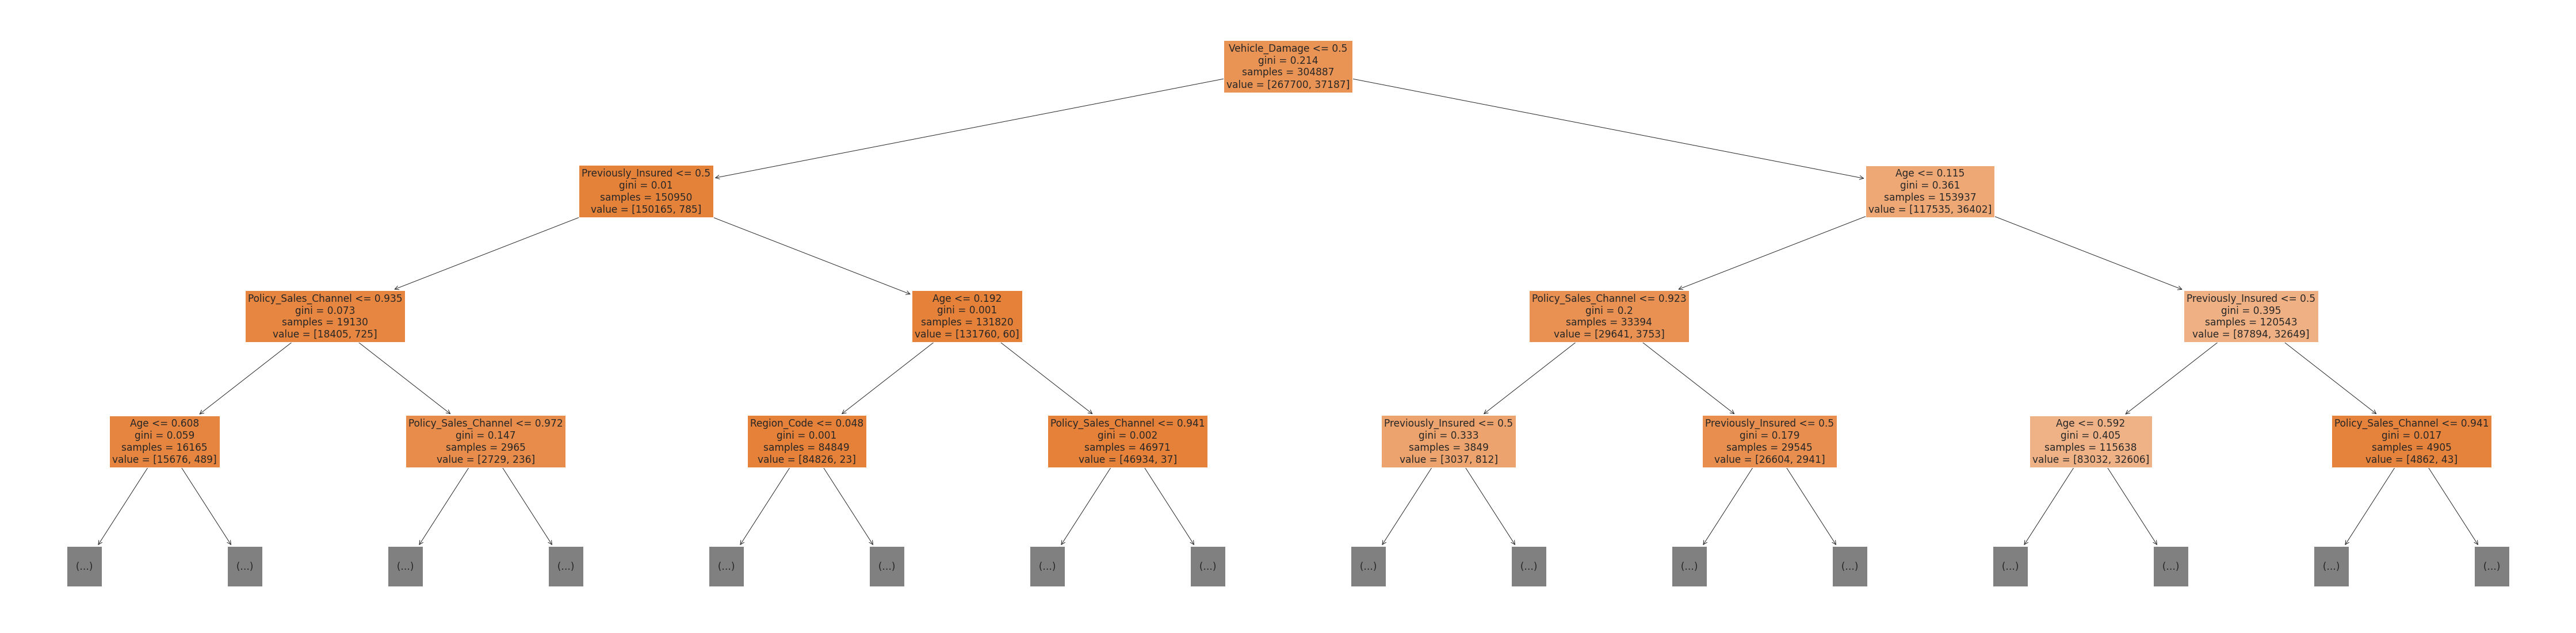

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model_2, feature_names=X_train.columns, max_depth=3, filled=True);

In [ ]:
model_2.feature_importances_

array([0.02497463, 0.13148203, 0.00057645, 0.10268734, 0.01257527,
       0.00940411, 0.12491632, 0.27135783, 0.04471703, 0.277309  ])

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_2.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df

,feature,importance
9,Vintage,0.277309
7,Annual_Premium,0.271358
1,Age,0.131482
6,Vehicle_Damage,0.124916
3,Region_Code,0.102687
8,Policy_Sales_Channel,0.044717
0,Gender,0.024975
4,Previously_Insured,0.012575
5,Vehicle_Age,0.009404
2,Driving_License,0.000576


#### Testing for max_depth hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params_grid = {
    'max_depth':[10,20,30,40,50]
}

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, 40, 50]})

In [ ]:
grid.best_params_

{'max_depth': 10}

In [ ]:
model_2_1 = grid.best_estimator_

In [ ]:
%%time
model_2_1.score(X_train,y_train)

CPU times: user 75.2 ms, sys: 1e+03 ns, total: 75.2 ms
Wall time: 75.4 ms


0.8789092352248538

In [ ]:
%%time
model_2_1.score(X_val,y_val)

CPU times: user 21.7 ms, sys: 846 µs, total: 22.5 ms
Wall time: 23 ms


0.8742226653722023

#### Testing for max_leaf_nodes hyperparameter

In [ ]:
params_grid = {
    'max_leaf_nodes':[5,10,15,20,25]
}

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [5, 10, 15, 20, 25]})

In [ ]:
grid.best_params_

{'max_leaf_nodes': 5}

In [ ]:
model_2_2 = grid.best_estimator_

In [ ]:
%%time
model_2_2.score(X_train,y_train)

CPU times: user 60.8 ms, sys: 1.96 ms, total: 62.8 ms
Wall time: 61.2 ms


0.8780302210327104

In [ ]:
%%time
model_2_2.score(X_val,y_val)

CPU times: user 18.7 ms, sys: 1.03 ms, total: 19.7 ms
Wall time: 20.3 ms


0.8750623179659416

#### Testing for criterion and splitter hyperparameter

In [ ]:
params_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),cv=5,param_grid=params_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [ ]:
model_2_3 = grid.best_estimator_

In [ ]:
%%time
model_2_3.score(X_train,y_train)

CPU times: user 174 ms, sys: 966 µs, total: 175 ms
Wall time: 175 ms


0.9998852033704291

In [ ]:
%%time
model_2_3.score(X_val,y_val)

CPU times: user 49.3 ms, sys: 0 ns, total: 49.3 ms
Wall time: 59.9 ms


0.8231219333000971

#### Using all the best parameters

In [ ]:
model_2_tuned = DecisionTreeClassifier(random_state=42,
                                       criterion='entropy',
                                       splitter='best',
                                       max_leaf_nodes=5,
                                       max_depth=10)

In [ ]:
model_2_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=5,
                       random_state=42)

In [ ]:
%%time
model_2_tuned.score(X_train,y_train)

CPU times: user 56.4 ms, sys: 10 µs, total: 56.4 ms
Wall time: 57.4 ms


0.8780302210327104

In [ ]:
%%time
model_2_tuned.score(X_val,y_val)

CPU times: user 19.8 ms, sys: 1.02 ms, total: 20.8 ms
Wall time: 19.1 ms


0.8750623179659416

Decision Tree with hyperparameter tuning-

Training Accuracy - 87.80302210327104%

Validation Accuracy - 87.50623179659416%

The training accuracy reduced but the validation accuracy improved significantly.

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_3 = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model_3.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
%%time
model_3.score(X_train, y_train)

CPU times: user 12.4 s, sys: 82.4 ms, total: 12.5 s
Wall time: 12.2 s


0.9998622440445148

In [ ]:
%%time
model_3.score(X_val, y_val)

CPU times: user 3.28 s, sys: 29.1 ms, total: 3.31 s
Wall time: 3.17 s


0.8649733672692923

In [ ]:
def predict_and_plot_3(inputs, targets, name=''):
    preds = model_3.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 86.50%
CPU times: user 3.38 s, sys: 56.9 ms, total: 3.43 s
Wall time: 3.45 s


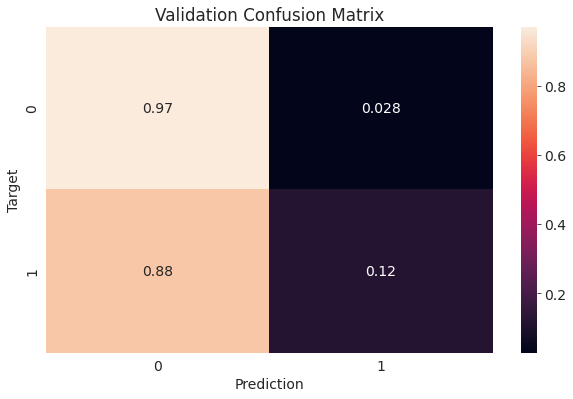

In [ ]:
%%time
val_preds_3 = predict_and_plot_3(X_val, y_val, 'Validation')

Random Forest Classifier without hyperparameter tuning-

Training Accuracy - 99.98622440445148%

Validation Accuracy - 86.49733672692923%

This model seems to be overfitting as training accuracy is very high and the validation accuracy is not so.

## Hyperparameter Tuning of Random Forest

In [ ]:
model_3.feature_importances_

array([0.01377792, 0.14299035, 0.00052909, 0.10698464, 0.04813046,
       0.01911754, 0.07683715, 0.24981284, 0.06238414, 0.27943588])

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_3.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df

,feature,importance
9,Vintage,0.279436
7,Annual_Premium,0.249813
1,Age,0.142990
3,Region_Code,0.106985
6,Vehicle_Damage,0.076837
8,Policy_Sales_Channel,0.062384
4,Previously_Insured,0.048130
5,Vehicle_Age,0.019118
0,Gender,0.013778
2,Driving_License,0.000529


#### Testing for n_estimators hyperparameter

In [ ]:
model_3_1_1 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 10)

In [ ]:
model_3_1_1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
%%time
model_3_1_1.score(X_train, y_train)

CPU times: user 1.23 s, sys: 13.9 ms, total: 1.25 s
Wall time: 767 ms


0.986667191451259

In [ ]:
%%time
model_3_1_1.score(X_val, y_val)

CPU times: user 330 ms, sys: 4.94 ms, total: 335 ms
Wall time: 220 ms


0.8618509091863241

In [ ]:
%%time
model_3_1_2 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 20)
model_3_1_2.fit(X_train,y_train)
print("Training Accuracy =",model_3_1_2.score(X_train, y_train))
print("Validation Accuracy =",model_3_1_2.score(X_val, y_val))

Training Accuracy = 0.9956410079800057
Validation Accuracy = 0.8631497467922647
CPU times: user 18.1 s, sys: 177 ms, total: 18.3 s
Wall time: 9.75 s


In [ ]:
%%time
model_3_1_3 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 50)
model_3_1_3.fit(X_train,y_train)
print("Training Accuracy =",model_3_1_3.score(X_train, y_train))
print("Validation Accuracy =",model_3_1_3.score(X_val, y_val))

Training Accuracy = 0.999524413963206
Validation Accuracy = 0.8645141822570911
CPU times: user 45.3 s, sys: 458 ms, total: 45.8 s
Wall time: 28.3 s


In [ ]:
%%time
model_3_1_4 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 100)
model_3_1_4.fit(X_train,y_train)
print("Training Accuracy =",model_3_1_4.score(X_train, y_train))
print("Validation Accuracy =",model_3_1_4.score(X_val, y_val))

Training Accuracy = 0.9998622440445148
Validation Accuracy = 0.8649733672692923
CPU times: user 1min 31s, sys: 864 ms, total: 1min 32s
Wall time: 52.3 s


In [ ]:
%%time
model_3_1_5 = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 150)
model_3_1_5.fit(X_train,y_train)
print("Training Accuracy =",model_3_1_5.score(X_train, y_train))
print("Validation Accuracy =",model_3_1_5.score(X_val, y_val))

Training Accuracy = 0.9998852033704291
Validation Accuracy = 0.8646322584030858
CPU times: user 2min 17s, sys: 1.28 s, total: 2min 19s
Wall time: 1min 15s


Best value = 100

#### Testing for max__features hyperparameter

In [ ]:
%%time
model_3_2_1 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 2)
model_3_2_1.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_1.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_1.score(X_val, y_val))

Training Accuracy = 0.9998524043334087
Validation Accuracy = 0.8648684106950749
CPU times: user 1min 18s, sys: 881 ms, total: 1min 19s
Wall time: 48.6 s


In [ ]:
%%time
model_3_2_2 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 3)
model_3_2_2.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_2.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_2.score(X_val, y_val))

Training Accuracy = 0.9998622440445148
Validation Accuracy = 0.8649733672692923
CPU times: user 1min 31s, sys: 1.6 s, total: 1min 32s
Wall time: 49.8 s


In [ ]:
%%time
model_3_2_3 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 6)
model_3_2_3.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_3.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_3.score(X_val, y_val))

Training Accuracy = 0.9998556842371108
Validation Accuracy = 0.8651832804177272
CPU times: user 2min 15s, sys: 1 s, total: 2min 16s
Wall time: 1min 11s


In [ ]:
%%time
model_3_2_4 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 8)
model_3_2_4.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_4.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_4.score(X_val, y_val))

Training Accuracy = 0.9998458445260047
Validation Accuracy = 0.8642517908215476
CPU times: user 2min 46s, sys: 1.03 s, total: 2min 47s
Wall time: 1min 27s


In [ ]:
%%time
model_3_2_5 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features = 10)
model_3_2_5.fit(X_train,y_train)
print("Training Accuracy =",model_3_2_5.score(X_train, y_train))
print("Validation Accuracy =",model_3_2_5.score(X_val, y_val))

Training Accuracy = 0.9998425646223027
Validation Accuracy = 0.8632678229382593
CPU times: user 3min 17s, sys: 959 ms, total: 3min 18s
Wall time: 1min 41s


#### Using all best parameters

In [ ]:
model_3_tuned = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=100,
                               max_features=6)

In [ ]:
model_3_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_jobs=-1, random_state=42)

In [ ]:
%%time
model_3_tuned.score(X_train, y_train)

CPU times: user 11.1 s, sys: 57.9 ms, total: 11.1 s
Wall time: 5.78 s


0.9998556842371108

In [ ]:
%%time
model_3_tuned.score(X_val, y_val)

CPU times: user 2.99 s, sys: 21 ms, total: 3.01 s
Wall time: 1.62 s


0.8651832804177272

Random Forest with hyperparameter tuning-

Training Accuracy - 99.98556842371108%

Validation Accuracy - 86.51832804177272%

Not much change was observed by changing and tuning these hyperparameters.

## Saving Best Model and Predicting on Test Data

In [ ]:
import joblib

In [ ]:
joblib.dump(model_2_tuned, 'vehicle-insurance-prediction-best-model.joblib')

['vehicle-insurance-prediction-best-model.joblib']

In [ ]:
loaded_model = joblib.load('vehicle-insurance-prediction-best-model.joblib')

In [ ]:
loaded_model.predict(test_df)

array([0, 0, 0, ..., 0, 0, 0])

## Summary

#### Best Model - Decision Tree with Hyperparameter Tuning

Training Accuracy - 87.80302210327104%

Validation Accuracy - 87.50623179659416%

Data Set Link - https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction


